# NetPyNE Tutorial 4: Importing cell models

NetPyNE allows the importation of cell models previously defined in external files using the `importCellParams()` method. This method will convert all the cell information into the required NetPyNE format. This is also a way to make use of cell models which have been implemented separately.

The `cellRule = netParams.importCellParams(label, conds, fileName, cellName, cellArgs={}, importSynMechs=False)` method takes as arguments the (arbitrary)label of the new cell rule, the name of the file where the cell is defined (`.py`, `.hoc`, or `.swc` files), and the name of the cell template (hoc) or cell class (Python).  If you wish to import the synaptic mechanisms parameters, you can set the `importSynMechs=True`.  The method returns the new cell rule so that it can be further modified.

There are many existing cell models available for use, for example, at [ModelDB](hhttps://senselab.med.yale.edu/ModelDB/)).  In this tutorial, we will import a variety of cell models from different file types.

## Preliminaries

If you are going to run this notebook locally using Jupyter Notebook, start from following instructions https://github.com/Neurosim-lab/netpyne/blob/development/netpyne/tutorials/README.md.

If you are using Open Source Brain or EBRAINS, everything is already set up.

On any other online platform (e.g. on Google Collab) you might need to run the following commmands to install NEURON and NetPyNE using **pip**:
```
!pip install neuron
!pip install netpyne
```

Now we are ready to start NetPyNE Tutorial.

## Compile mechanisms

The cell models require membrane mechanisms (e.g. channel models) that are not built-in to NEURON.  So, now we will compile the necessary mechanisms (in the `mod` directory) using `nrnivmodl`.  You can learn more about mechanisms and `.mod` files in the [NEURON documentation](https://www.neuron.yale.edu/neuron/static/py_doc/modelspec/programmatic/mechanisms/nmodl.html). 

In [1]:
!nrnivmodl mod

/home/hyunsu/miniconda3/envs/netpyne/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
/home/storage2/hyunsu_DATA/GitHub_Active/netpyne_tutorial/Tutorial_notebooks_in_git
Mod files: "mod/mod/A.mod" "mod/mod/AMPA.mod" "mod/mod/ar.mod" "mod/mod/beforestep_py.mod" "mod/mod/cadad.mod" "mod/mod/cad.mod" "mod/mod/cadyn.mod" "mod/mod/cagk.mod" "mod/mod/cal_mh.mod" "mod/mod/cal_mig.mod" "mod/mod/ca.mod" "mod/mod/canin.mod" "mod/mod/can_mig.mod" "mod/mod/catcb.mod" "mod/mod/cat_mig.mod" "mod/mod/cat.mod" "mod/mod/cat_traub.mod" "mod/mod/dipole.mod" "mod/mod/dipole_pp.mod" "mod/mod/ElectSyn.mod" "mod/mod/expsynstdp.mod" "mod/mod/GABAa.mod" "mod/mod/gabab.mod" "mod/mod/h_BS.mod" "mod/mod/HCN1.mod" "mod/mod/hh2.mod" "mod/mod/hh3.mod" "mod/mod/h_harnett.mod" "mod/mod/hin.mod" "mod/mod/h_kole.mod" "mod/mod/h_migliore.mod" "mod/mod/ican_sidi.mod" "mod/mod/IC.mod" "mod/mod/iho

This should have created a new directory: `x86_64` which contains the compiled mechanisms NEURON can use.

## Instantiate network parameters and simulation configuration



You need two things to define a model/simulation in NetPyNE: 1) the parameters of the network and all its components (**netParams**) and 2) the configuration of the simulation (**simConfig**).  These requirements exist as objects in NetPyNE.  Let's instantiate them now.

In [2]:
from netpyne import specs, sim

netParams = specs.NetParams()
simConfig = specs.SimConfig()

--No graphics will be displayed.


The following line allows figures to be shown in this notebook:

In [3]:
%matplotlib inline

## Import cell models


### Import a NEURON cell model from a Python file

Please open the file `HHCellFile.py` in the `cells` directory to see how this cell model is defined in NEURON/Python.  In particular, note that the cell model is defined in a class named `HHCellClass`.  This must be included as the `cellName` so that NetPyNE knows how to instantiate the model.

Now we will import it into NetPyNE:

In [4]:
cellRule = netParams.importCellParams(
    label="python_model",
    fileName="cells/HHCellFile.py",
    cellName="HHCellClass",
    importSynMechs=True,
)

### Import a cell morphology from a HOC file

Please open the file `geom.hoc` in the `cells` directory in a text-editor to see how this morphology is defined in a template named `E21`.  This must be included as the `cellName` so that NetPyNE knows how to instantiate the model.

Note that this file just defines the morphology of a cell, not any membrane mechanisms.

In [5]:
cellRule = netParams.importCellParams(
    label="hoc_morph",
    fileName="cells/geom.hoc",
    cellName="E21",
    importSynMechs=False,
)

Because the file we are importing contains no mechanisms, just the cell's morphology, we will add the default NEURON Hodgkin-Huxley mechanism into the soma section and a passive leak current in all sections. 


In [6]:
cellRule["secs"]["soma"]["mechs"]["hh"] = {
    "gnabar": 0.12,
    "gkbar": 0.036,
    "gl": 0.003,
    "el": -70,
}
for secName in cellRule["secs"]:
    cellRule["secs"][secName]["mechs"]["pas"] = {"g": 0.0000357, "e": -70}
    cellRule["secs"][secName]["geom"]["cm"] = 1

### Import a cell morphology from an SWC file

Please open the file `BS0284.swc` in the `cells` directory in a text-editor to see how this morphology is defined.  SWC is a common file format for neuron morphology, but SWC files do not specify a complete cell model, they only define the morphology of a cell.  There are many experimentally reconstructed neuron morphologies available for download at [NeuroMorpho](https://neuromorpho.org).

In [7]:
cellRule = netParams.importCellParams(
    label="swc_morph",
    fileName="cells/BS0284.swc",
    cellName="",
    importSynMechs=False,
)

Because the file we are importing contains no mechanisms, just the cell's morphology, we will add the default NEURON Hodgkin-Huxley mechanism into the soma section and a passive leak current in all sections.

In [8]:
for secName in cellRule["secs"]:
    cellRule["secs"][secName]["mechs"]["pas"] = {"g": 0.0000357, "e": -70}
    cellRule["secs"][secName]["geom"]["cm"] = 1
    if secName.startswith("soma"):
        cellRule["secs"][secName]["mechs"]["hh"] = {
            "gnabar": 0.12,
            "gkbar": 0.036,
            "gl": 0.003,
            "el": -70,
        }

If a morphology has multiple sections defining the soma, it is convenient for recording and analysis to rename the first soma section to just `soma`.

In [9]:
netParams.renameCellParamsSec("swc_morph", "soma_0", "soma")

### Import a complete cell model from a HOC file

Please open the file `pyr3_traub.hoc` in the `cells` directory in a text-editor to see how this model is defined in a template named `pyr3`.  This must be included as the `cellName` so that NetPyNE knows how to instantiate the model. 

In [10]:
cellRule = netParams.importCellParams(
    label="hoc_model",
    fileName="cells/pyr3_traub.hoc",
    cellName="pyr3",
)

Looking in the file, we can see that the soma compartment is `comp[1]`, which becomes `comp_1` in NetPyNE.  We will rename this section for convenience.

In [11]:
netParams.renameCellParamsSec("hoc_model", "comp_1", "soma")

## Make populations from the imported cell models

We'll make a population for each cell type, consisting of just one cell.

In [12]:
netParams.popParams["python_pop"] = {"cellType": "python_model", "numCells": 1}
netParams.popParams["hoc_morph_pop"] = {"cellType": "hoc_morph", "numCells": 1}
netParams.popParams["swc_morph_pop"] = {"cellType": "swc_morph", "numCells": 1}
netParams.popParams["hoc_model_pop"] = {"cellType": "hoc_model", "numCells": 1}

## Set up the simulation configuration

In [13]:
simConfig.filename = "netpyne_tut2"
simConfig.duration = 200.0
simConfig.dt = 0.1

We will record the voltage in the middle of the soma compartment for all cells.

In [14]:
simConfig.recordCells = ["all"]
simConfig.recordTraces = {
    "V_soma": {
        "sec": "soma",
        "loc": 0.5,
        "var": "v",
    },
}

Finally we will set up the traces plots to be automatically generated and saved.

In [15]:
simConfig.analysis = {
    "plotTraces": {
        "include": ["all"],
        "saveFig": True,
    },
}

## Create, simulate, and analyze the model


Use one simple command to create, simulate, and analyze the model.


Start time:  2024-10-30 15:18:34.115268




Creating network of 4 cell populations on 1 hosts...: 100%|##########|

  Number of cells on node 0: 4 
  Done; cell creation time = 0.06 s.
Making connections...
  Number of connections on node 0: 0 
  Done; cell connection time = 0.00 s.
  Number of stims on node 0: 0 
  Done; cell stims creation time = 0.00 s.
Recording 4 traces of 1 types on node 0

Running simulation using NEURON for 200.0 ms...
  Done; run time = 0.19 s; real-time ratio: 1.06.

Gathering data...
  Done; gather time = 0.03 s.

Analyzing...
  Cells: 4
  Connections: 0 (0.00 per cell)
  Spikes: 1 (1.25 Hz)
  Simulated time: 0.2 s; 1 workers
  Run time: 0.19 s
Plotting recorded cell traces ... 

cell


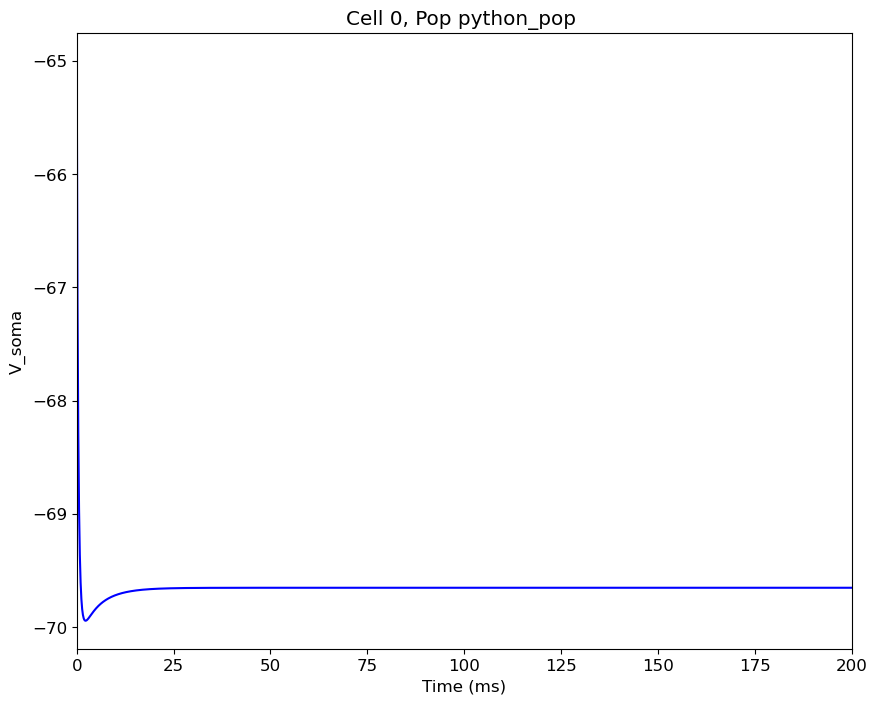

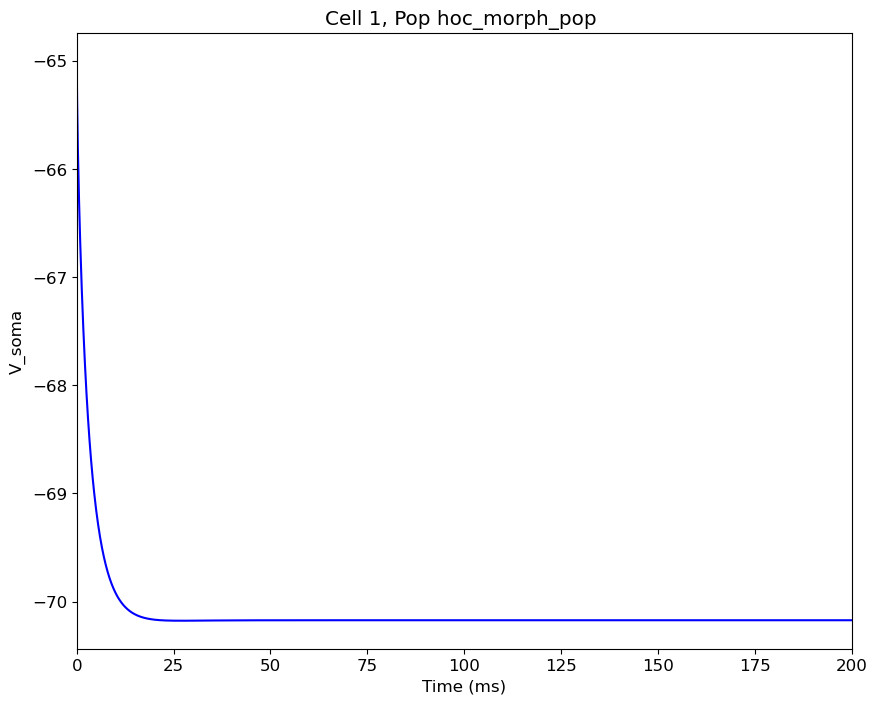

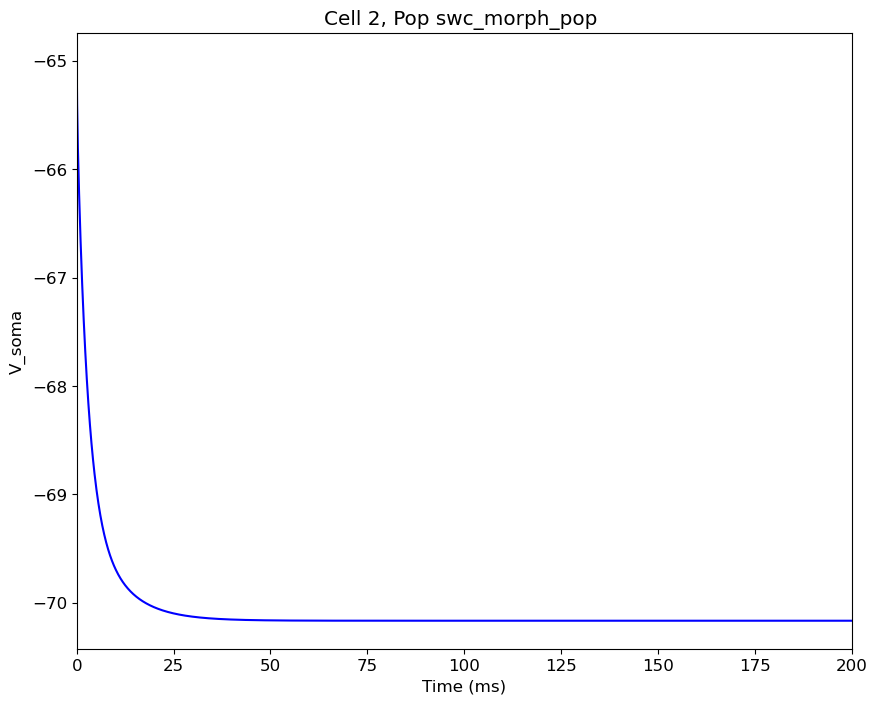

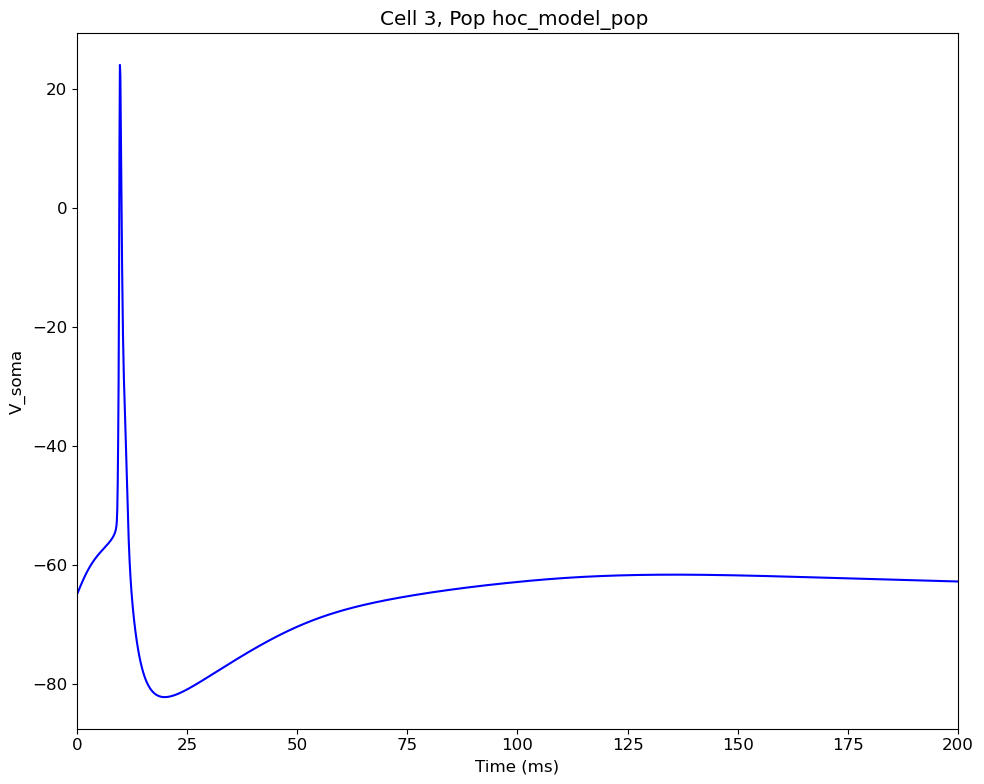

  Done; plotting time = 0.89 s

Total time = 1.20 s


In [16]:
sim.createSimulateAnalyze(netParams=netParams, simConfig=simConfig)

## Visualize the cell models

We can use the `plotShape` function to visualize the cells.  You can see all the options available for **plotShape** here:
http://netpyne.org/reference.html#netpyne.analysis.plotShape

Plotting 3D cell shape ...
Plotting 3D cell shape ...
Plotting 3D cell shape ...
Plotting 3D cell shape ...


(<Figure size 640x480 with 1 Axes>, {})

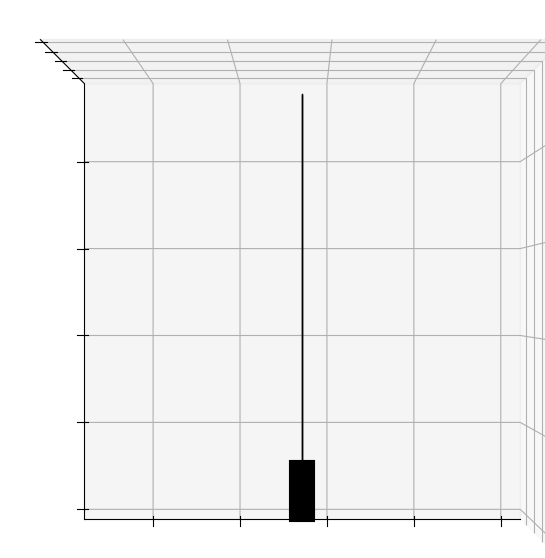

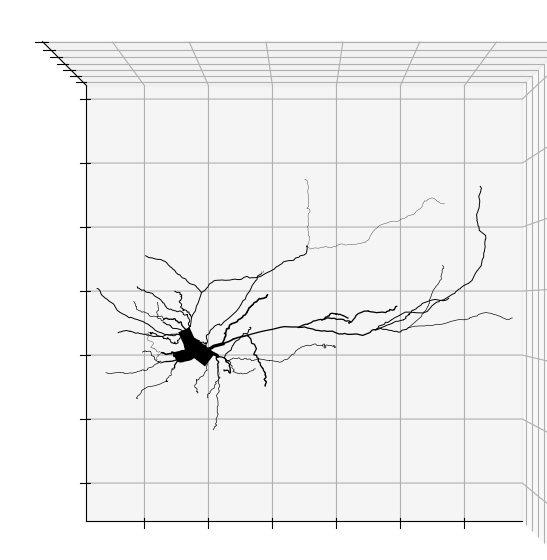

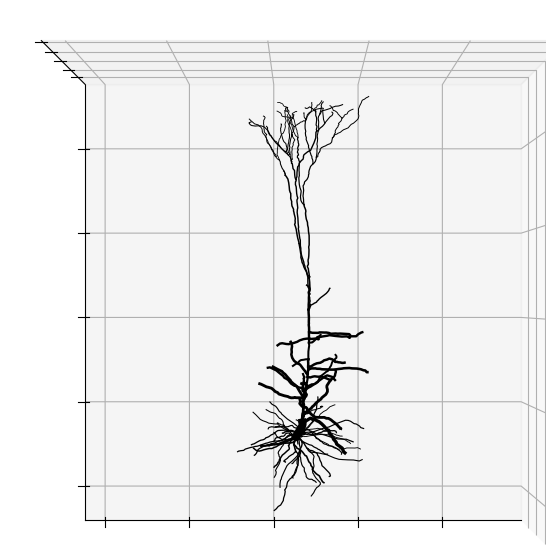

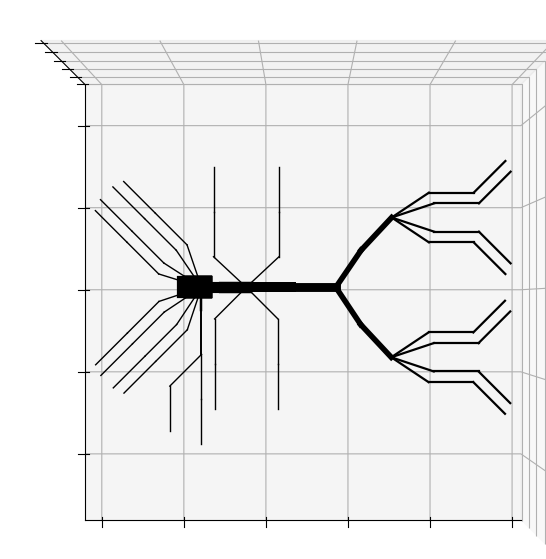

In [17]:
sim.analysis.plotShape(
    includePre=["python_pop"], includePost=["python_pop"], showFig=True
)
sim.analysis.plotShape(
    includePre=["hoc_morph_pop"], includePost=["hoc_morph_pop"], showFig=True
)
sim.analysis.plotShape(
    includePre=["swc_morph_pop"], includePost=["swc_morph_pop"], showFig=True
)
sim.analysis.plotShape(
    includePre=["hoc_model_pop"], includePost=["hoc_model_pop"], showFig=True
)

Congratulations!  You have imported existing cell models of a variety of types for use in simulations.

There are several other NetPyNE tutorials available.